In [6]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import EfficientNetB1

In [2]:
from google.colab import drive  
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/cats_and_dogs_filtered'

In [4]:
# Training folder path
Train_path='/content/drive/MyDrive/cats_and_dogs_filtered/train' 

# Testing folder path
Test_path='/content/drive/MyDrive/cats_and_dogs_filtered/validation' 

In [ ]:
model = tf.keras.Sequential()#Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    #model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
    
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2)) ## 
    
#model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3)) ##
model.add(Dense(2, activation = 'softmax'))

In [18]:
base_model = EfficientNetB1(weights="imagenet", include_top=False, input_shape=(64,64,3))
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(2,activation=('softmax')))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 2, 2, 1280)       6575239   
                                                                 
 flatten_1 (Flatten)         (None, 5120)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              5243904   
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)               

In [19]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_filtered/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [22]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cats_and_dogs_filtered/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [23]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [24]:
history = model.fit(training_set, validation_data = test_set, batch_size = 32, epochs = 25, verbose = 1)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 29s 272ms/step - loss: 0.6656 - accuracy: 0.6650 - val_loss: 1.2181 - val_accuracy: 0.5000
Epoch 2/25
63/63 [==============================] - 17s 263ms/step - loss: 0.5147 - accuracy: 0.7735 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 3/25
63/63 [==============================] - 15s 239ms/step - loss: 0.4267 - accuracy: 0.8165 - val_loss: 1.1105 - val_accuracy: 0.5000
Epoch 4/25
63/63 [==============================] - 15s 245ms/step - loss: 0.3792 - accuracy: 0.8510 - val_loss: 0.7029 - val_accuracy: 0.5020
Epoch 5/25
63/63 [==============================] - 15s 245ms/step - loss: 0.3336 - accuracy: 0.8590 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 6/25
63/63 [==============================] - 15s 241ms/step - loss: 0.3022 - accuracy: 0.8800 - val_loss: 0.7072 - val_accuracy: 0.5000
Epoch 7/25
63/63 [==============================] - 15s 238ms/step - loss: 0.2859 - accuracy: 0.8865 - val_loss: 0.7790 - val_accuracy: 0.5000
Epoch 8/25

In [25]:
import matplotlib.pyplot as plt

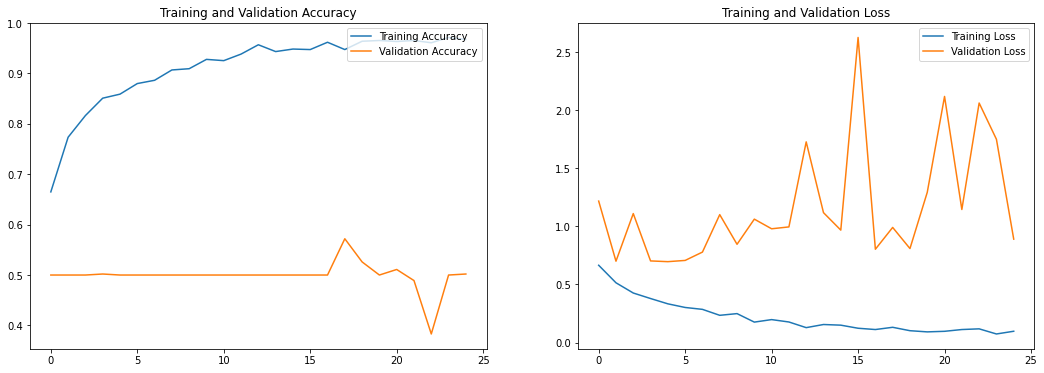

In [26]:
# Plot accuracy and  loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
from tensorflow.keras.models import load_model
model.save('model_effi_net.h5')

In [33]:
 import numpy as np

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('model_effi_net.h5')

dog


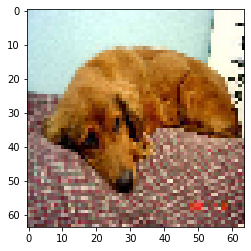

In [41]:
class_dict = {0: "dog", 1: "cat"}
test_img=image.load_img('/content/drive/MyDrive/cats_and_dogs_filtered/validation/dogs/dog.2023.jpg',target_size=(64,64))

plt.imshow(test_img)

plt.grid(False)

test_img1 = np.expand_dims(test_img, axis=0)

pred = model.predict(test_img1)
pred = np.argmax(pred)
pred_class =class_dict[pred]
print(pred_class)